In [1]:
import keras
from keras import layers,models
from keras import datasets
from keras.utils import np_utils  # one-hot Encoding
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.
C:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type

In [2]:
(X_train,y_train),(X_test,y_test)=datasets.fashion_mnist.load_data()
y_train[0],X_train[0],y_train[0].shape,X_train[0].shape

(9,
 array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
        

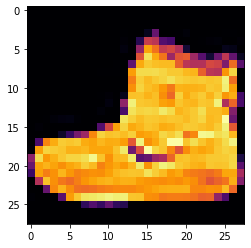

In [3]:
plt.imshow(X_train[0],cmap="inferno")

In [5]:
L,W,H=X_train.shape
X_train=X_train.reshape(-1,W*H)
X_test=X_test.reshape(-1,W*H)

ValueError: not enough values to unpack (expected 3, got 2)

In [6]:
X_train=X_train/255
X_test=X_test/255

In [7]:
# one hot encoding
Y_train=np_utils.to_categorical(y_train)
Y_test=np_utils.to_categorical(y_test)
Y_train[30],y_train[30]

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32), 5)

# Drop out : Overfitting을 방지하기 위한 일종의 가지치기

In [8]:
model=models.Sequential()
model.add(layers.Dense(100,activation="relu",input_shape=(W*H,)))#input은 처음에만 넣음
model.add(layers.Dropout(0.35))
model.add(layers.Dense(50,activation="relu"))
model.add(layers.Dropout(0.15))
model.add(layers.Dense(10,activation="softmax"))

In [9]:
model.compile("adam","categorical_crossentropy",metrics=['accuracy'])

In [10]:
model.fit(X_train,Y_train,epochs=20,batch_size=100,validation_split=0.2,verbose=0)

In [11]:
model_eval=model.evaluate(X_test,Y_test,batch_size=100)
print("Loss : {}, Accuracy : {}".format(*model_eval))

10000/10000 [==============================] - 0s 27us/step
Loss : 0.3577863845229149, Accuracy : 0.8701000213623047


In [12]:
# 10. 시각화
# fit, 트레이닝할 때 나오는 로그 메세지를 모아서 리턴 - history
import matplotlib.pyplot as plt
def plot_loss(history):
    plt.plot(history.history["loss"])
    plt.plot(history.history["val_loss"])
    plt.legend()
    plt.title("Loss")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")

    plt.savefig('C:/바탕 화면/playdata/ice/eclipse/SpringWorkspace/sp10_SpringMVC_MultiFile/src/main/webapp/upload/Loss.png',dpi=300)
    
def plot_acc(history):
    plt.plot(history.history["accuracy"])
    plt.plot(history.history["val_accuracy"])
    plt.legend()
    plt.title("accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("Epoch")
        
    plt.savefig('C:/바탕 화면/playdata/ice/eclipse/SpringWorkspace/sp10_SpringMVC_MultiFile/src/main/webapp/upload/Accuracy.png',dpi=300)
    
history=model.fit(X_train,Y_train,epochs=50,batch_size=100,validation_split=0.2)
    
    

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 2s 45us/step - loss: 0.3112 - accuracy: 0.8848 - val_loss: 0.3255 - val_accuracy: 0.8842
Epoch 2/50
48000/48000 [==============================] - 2s 41us/step - loss: 0.3110 - accuracy: 0.8836 - val_loss: 0.3331 - val_accuracy: 0.8814
Epoch 3/50
48000/48000 [==============================] - 2s 42us/step - loss: 0.3041 - accuracy: 0.8868 - val_loss: 0.3214 - val_accuracy: 0.8842
Epoch 4/50
48000/48000 [==============================] - 3s 54us/step - loss: 0.3045 - accuracy: 0.8878 - val_loss: 0.3193 - val_accuracy: 0.8886
Epoch 5/50
48000/48000 [==============================] - 2s 42us/step - loss: 0.3009 - accuracy: 0.8869 - val_loss: 0.3191 - val_accuracy: 0.8867
Epoch 6/50
48000/48000 [==============================] - 2s 37us/step - loss: 0.3003 - accuracy: 0.8884 - val_loss: 0.3229 - val_accuracy: 0.8871
Epoch 7/50
48000/48000 [==============================] - 2s 52us/st

No handles with labels found to put in legend.


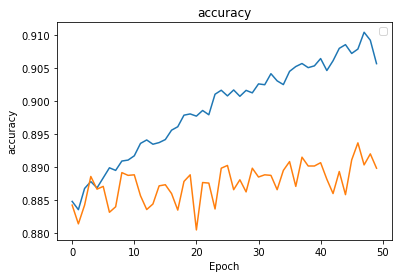

In [13]:
plot_acc(history)

No handles with labels found to put in legend.


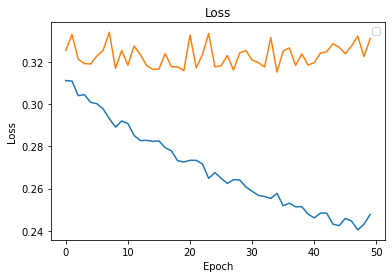

In [14]:
plot_loss(history)

# Image Data Plotting

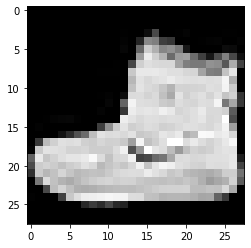

In [15]:
plt.imshow(X_train[0].reshape(28,28),cmap="gray")

<function matplotlib.pyplot.show(*args, **kw)>

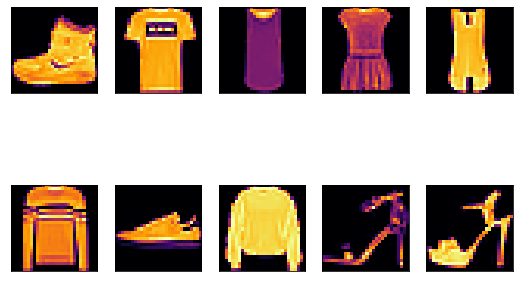

In [16]:
row=2
col=5

grid=range(10)
fig,axs=plt.subplots(nrows=row,ncols=col,figsize=(9,6),subplot_kw={"xticks":[],"yticks":[]})

for ax,i in zip(axs.flat,grid):
    ax.imshow(X_train[i].reshape(28,28),cmap="inferno")
plt.show